# Практическое задание 3

In [10]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Датасет с рукописными буквами

https://www.tensorflow.org/datasets/catalog/binary_alpha_digits

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [13]:
len(classes)

36

In [14]:
classes = [str(i) for i in range(10)] +  list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
print(classes)

X = np.load('binary_alpha_digits_images.npy')
y = np.load('binary_alpha_digits_labels.npy')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [15]:
len(list('ABCDEFGHIJKLMNOPQRSTUVWXYZ'))

26

In [16]:
X.shape, y.shape

((1404, 20, 16), (1404,))

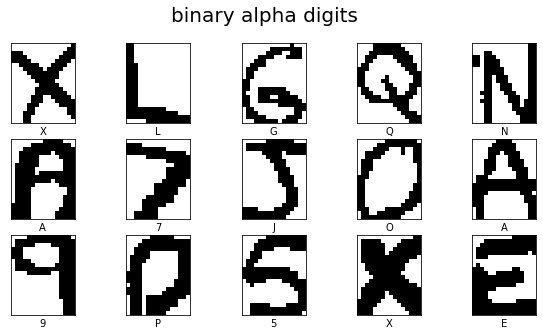

In [17]:
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
fig.suptitle('binary alpha digits', fontsize=20)
n = 0
for ax in axes.flat:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.imshow(X[n], cmap=plt.cm.binary)
    ax.set_xlabel(classes[y[n]])
    n += 1

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=28)

### Baseline

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
hstr = model.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
30/30 [==============================] - 0s 860us/step - loss: 3.3063 - accuracy: 0.1394
Epoch 2/3
30/30 [==============================] - 0s 757us/step - loss: 2.3033 - accuracy: 0.4415
Epoch 3/3
30/30 [==============================] - 0s 757us/step - loss: 1.5578 - accuracy: 0.6319


In [21]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 784us/step - loss: 1.5524 - accuracy: 0.6013


[1.5524040460586548, 0.6012930870056152]

**Поменяем функцию активации и увеличим число эпох**

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='softsign'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [23]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=1)
print('\nРезультат на тесте:')
model.evaluate(X_test, y_test)

Epoch 1/10
30/30 [==============================] - 0s 825us/step - loss: 3.3185 - accuracy: 0.1500
Epoch 2/10
30/30 [==============================] - 0s 791us/step - loss: 2.5204 - accuracy: 0.4702
Epoch 3/10
30/30 [==============================] - 0s 825us/step - loss: 1.9876 - accuracy: 0.6191
Epoch 4/10
30/30 [==============================] - 0s 791us/step - loss: 1.6180 - accuracy: 0.6787
Epoch 5/10
30/30 [==============================] - 0s 825us/step - loss: 1.3498 - accuracy: 0.7500
Epoch 6/10
30/30 [==============================] - 0s 757us/step - loss: 1.1598 - accuracy: 0.7596
Epoch 7/10
30/30 [==============================] - 0s 825us/step - loss: 1.0075 - accuracy: 0.7947
Epoch 8/10
30/30 [==============================] - 0s 757us/step - loss: 0.8817 - accuracy: 0.8298
Epoch 9/10
30/30 [==============================] - 0s 791us/step - loss: 0.7859 - accuracy: 0.8383
Epoch 10/10
30/30 [==============================] - 0s 791us/step - loss: 0.7019 - accuracy: 0.8628

[1.18643057346344, 0.6875]

**Добавим регуляризацию, новые слои, изменяющуюся скорость обучения и пр. фишки:**

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='softsign', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=10),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.5)),
    keras.layers.Dropout(0.1),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='softsign'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(36)
])

In [25]:
boundaries = [2000, 4000]
values = [0.01, 0.005, 0.001]
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=1)

Epoch 1/10
30/30 [==============================] - 1s 1ms/step - loss: 276.4023 - accuracy: 0.0989  
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 12.7030 - accuracy: 0.3085
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 6.6926 - accuracy: 0.2989
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 6.4099 - accuracy: 0.3447
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 6.4341 - accuracy: 0.3160
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 6.3724 - accuracy: 0.3457
Epoch 7/10
30/30 [==============================] - 0s 1ms/step - loss: 6.4651 - accuracy: 0.2851
Epoch 8/10
30/30 [==============================] - 0s 1ms/step - loss: 6.7047 - accuracy: 0.3053
Epoch 9/10
30/30 [==============================] - 0s 1ms/step - loss: 6.2848 - accuracy: 0.2745
Epoch 10/10
30/30 [==============================] - 0s 1ms/step - loss: 6.3616 - accuracy: 0.3181


In [27]:
model.evaluate(X_test, y_test)

15/15 [==============================] - 0s 783us/step - loss: 6.7656 - accuracy: 0.1552


[6.765630722045898, 0.1551724076271057]

**Результаты так себе, уменьшим регуляризацию и dropout**

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='softsign', 
                       kernel_regularizer=tf.keras.regularizers.L2(l2=0.05),
                       bias_regularizer=tf.keras.regularizers.L2(l2=0.05)),
    keras.layers.Dropout(0.01),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='softsign'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(36)
])

boundaries = [2000, 4000]
values = [0.01, 0.005, 0.001]
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=1)

model.evaluate(X_test, y_test)

Epoch 1/10
30/30 [==============================] - 1s 1ms/step - loss: 5.7144 - accuracy: 0.3660
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 2.6962 - accuracy: 0.5426
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 2.5898 - accuracy: 0.5511
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 2.5399 - accuracy: 0.5979
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 2.6349 - accuracy: 0.5670
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 2.5968 - accuracy: 0.6117
Epoch 7/10
30/30 [==============================] - 0s 1ms/step - loss: 2.4955 - accuracy: 0.6000
Epoch 8/10
30/30 [==============================] - 0s 1ms/step - loss: 2.5477 - accuracy: 0.6021
Epoch 9/10
30/30 [==============================] - 0s 1ms/step - loss: 2.4760 - accuracy: 0.6255
Epoch 10/10
15/15 [==============================] - 0s 855us/step - loss: 3.4970 - accuracy: 0.4353


[3.4970033168792725, 0.4353448152542114]

**Уже лучше, но не дотягивает до самой простой NN, уберём регуляризацию и чуть увеличим dropout**

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(500, activation='softsign'),
    keras.layers.Dropout(0.05),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='softsign'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(36)
])

boundaries = [2000, 4000]
values = [0.01, 0.005, 0.001]
lr_schedule = keras.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)
optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=1)

model.evaluate(X_test, y_test)

Epoch 1/10
30/30 [==============================] - 1s 2ms/step - loss: 2.2876 - accuracy: 0.3638
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 1.0408 - accuracy: 0.6798
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.7489
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5555 - accuracy: 0.8053
Epoch 5/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.8309
Epoch 6/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.8255
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8500
Epoch 8/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8266
Epoch 9/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8394
Epoch 10/10
15/15 [==============================] - 0s 998us/step - loss: 1.6009 - accuracy: 0.6164


[1.600893497467041, 0.6163793206214905]

In [32]:
from keras.utils.vis_utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


Остановимся на простой NN с лучшем результатом ~0,7 на тесте. Видимо, в данном случае проще - значит лучше

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20, 16)),
    keras.layers.Dense(128, activation='softsign'),
    keras.layers.Dense(36)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [50]:
hstr = model.fit(X_train, y_train, epochs=10, verbose=0)
print('\nРезультат на тесте:')
model.evaluate(X_test, y_test)


Результат на тесте:
15/15 [==============================] - 0s 926us/step - loss: 1.1678 - accuracy: 0.7026


[1.1678446531295776, 0.7025862336158752]